In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Regression

### 1.Linear Regression

MSE: 104.20222653187025
MAE: 8.416659922209053


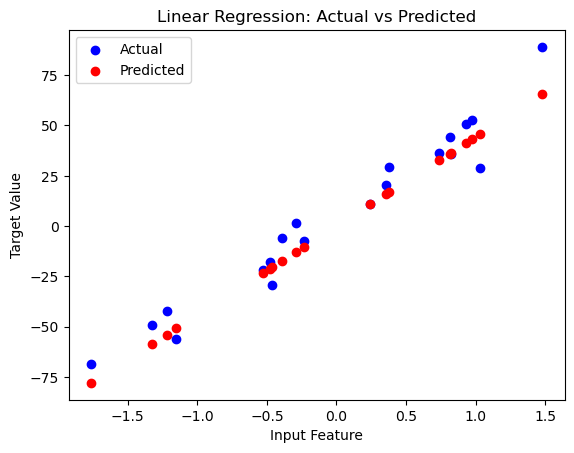

In [2]:
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression

# Dataset
X, y = make_regression(n_samples=100, n_features=1, noise=10, random_state=42)

# Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Model
model = LinearRegression()
model.fit(X_train, y_train)

# Prediction
y_pred = model.predict(X_test)

# Evaluation
print("MSE:", mean_squared_error(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))

# Plot
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.scatter(X_test, y_pred, color='red', label='Predicted')
plt.xlabel("Input Feature")
plt.ylabel("Target Value")
plt.title("Linear Regression: Actual vs Predicted")
plt.legend()
plt.show()

### 2. Multilinear Regression

In [3]:
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression

# Dataset
X, y = make_regression(n_samples=150, n_features=4, noise=15, random_state=1)

# Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=1
)

# Model
model = LinearRegression()
model.fit(X_train, y_train)

# Prediction
y_pred = model.predict(X_test)

# Evaluation
print("MSE:", mean_squared_error(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))

MSE: 205.7715811675428
MAE: 11.226091422174765


### 3. Polynomial Regression

MSE: 91.16159861274994
MAE: 7.959920228496015


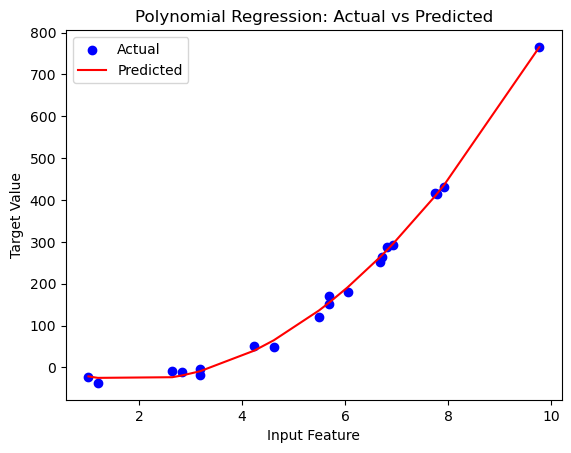

In [4]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Non-linear dataset
np.random.seed(0)
X = np.random.rand(100, 1) * 10
y = 13 * X**2 - 50 * X + 15 + np.random.randn(100, 1) * 10

# Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Polynomial features
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Model
model = LinearRegression()
model.fit(X_train_poly, y_train)

# Prediction
y_pred = model.predict(X_test_poly)

# Evaluation
print("MSE:", mean_squared_error(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))

# Plot
X_sorted = np.argsort(X_test[:, 0])

plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test[X_sorted], y_pred[X_sorted], color='red', label='Predicted')
plt.xlabel("Input Feature")
plt.ylabel("Target Value")
plt.title("Polynomial Regression: Actual vs Predicted")
plt.legend()
plt.show()

### 4. Lasso Regression

In [5]:
from sklearn.datasets import make_regression
from sklearn.linear_model import Lasso

# Dataset
X, y = make_regression(
    n_samples=120, n_features=6, noise=20, random_state=42
)

# Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Model
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)

# Prediction
y_pred = lasso.predict(X_test)

# Evaluation
print("MSE:", mean_squared_error(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("Non-zero coefficients:", np.sum(lasso.coef_ != 0))

MSE: 552.1937923612472
MAE: 19.641347901516898
Non-zero coefficients: 6


# Decision Tree

In [6]:
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay

Decision Tree Accuracy: 0.94737


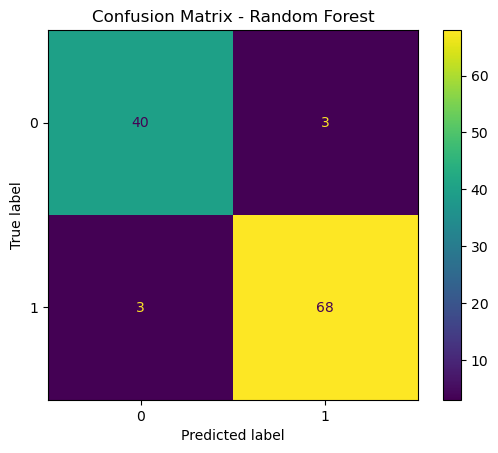

In [7]:
# Load dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Model
dt = DecisionTreeClassifier(
    criterion='gini',
    max_depth=4,
    random_state=42
)

dt.fit(X_train, y_train)

# Prediction
y_pred = dt.predict(X_test)

# Evaluation
print(f"Decision Tree Accuracy: {accuracy_score(y_test, y_pred):.5f}")

disp = ConfusionMatrixDisplay.from_predictions(y_test,y_pred)

# Plot
disp.ax_.set_title("Confusion Matrix - Random Forest")
plt.show()

# Random Forest

In [8]:
from sklearn.ensemble import RandomForestClassifier

Accuracy: 0.96491


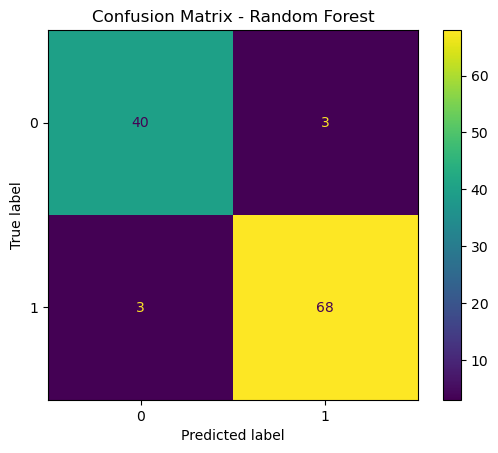

Top 10 features selected : 


worst area              0.155283
worst concave points    0.148044
mean concave points     0.104995
worst radius            0.080367
mean concavity          0.067176
worst perimeter         0.064047
mean perimeter          0.054542
mean radius             0.050548
mean area               0.048100
worst concavity         0.032764
dtype: float64

In [9]:
# Model
rf = RandomForestClassifier(
    n_estimators=100,
    max_depth=6,
    random_state=42
)

rf.fit(X_train, y_train)

# Prediction
y_pred_rf = rf.predict(X_test)

# Evaluation
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.5f}")

disp = ConfusionMatrixDisplay.from_predictions(y_test,y_pred)

# Plot
disp.ax_.set_title("Confusion Matrix - Random Forest")
plt.show()

feature_importance = pd.Series(
rf.feature_importances_,
index=data.feature_names
).sort_values(ascending=False)

print("Top 10 features selected : ")
feature_importance.head(10)

# KNN

In [10]:
from sklearn.datasets import load_breast_cancer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

In [11]:
data = load_breast_cancer()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#feature scaling
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [12]:
knn = KNeighborsClassifier(n_neighbors=5,metric='euclidean')
knn.fit(X_train_scaled, y_train)

y_pred_knn = knn.predict(X_test_scaled)

accuracy_k5 = accuracy_score(y_test, y_pred_knn)

print(f"Accuracy: {(accuracy_k5):.5f}")
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))

Accuracy: 0.94737

Confusion Matrix:
 [[40  3]
 [ 3 68]]


For k = 9, 0.96491 was the highest accuracy


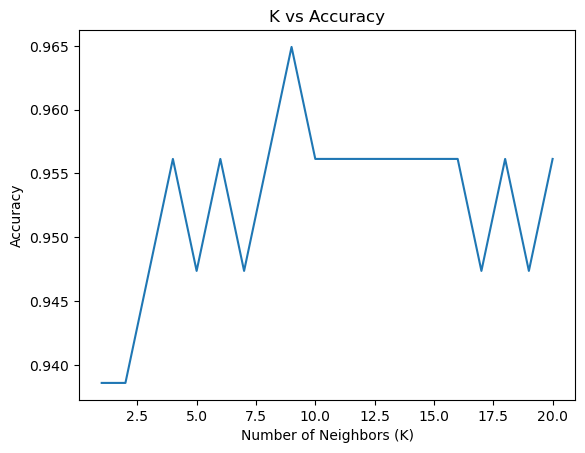

In [13]:
#selecting best value of k
k_values = range(1, 21)
accuracies = []

for k in k_values:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    accuracies.append(accuracy_score(y_test, y_pred))

best_acc = max(accuracies)
best_k = k_values[accuracies.index(best_acc)]

print(f"For k = {best_k}, {best_acc:.5f} was the highest accuracy")
    
plt.plot(k_values, accuracies)
plt.xlabel("Number of Neighbors (K)")
plt.ylabel("Accuracy")
plt.title("K vs Accuracy")
plt.show()

# SVM

In [14]:
from sklearn.datasets import load_iris
from sklearn.svm import SVC

In [15]:
data = load_iris(as_frame=True)
data.frame.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [16]:
#selecting only two parameters for displaying results

X = data.data
X_new = X.iloc[:,[0,1]]  #mean radius and mean perimeter

y = data.target

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [18]:
#rbf - Radial Basis Function - creates a curved decision boundary
#kernel - defiens the function used by SVM to transform data to higher dimension
#C - regularization parameter - maximizing the margin and minimizing classification error.

svm_rbf = SVC(kernel='rbf',C=1.0,gamma='scale')
svm_rbf.fit(X_train_scaled, y_train)
y_pred_svm_rbf = svm_rbf.predict(X_test_scaled)

print("1.kernel - rbf\nAccuracy : ", accuracy_score(y_test, y_pred_svm_rbf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm_rbf))

1.kernel - rbf
Accuracy :  0.8333333333333334
Confusion Matrix:
 [[10  0  0]
 [ 0  7  2]
 [ 0  3  8]]


In [19]:
svm_linear = SVC(kernel='linear',C=1.0)
svm_linear.fit(X_train_scaled, y_train)
y_pred_svm_linear = svm_linear.predict(X_test_scaled)

print("2.kernel : linear\nAccuracy : ", accuracy_score(y_test, y_pred_svm_linear))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm_linear))

2.kernel : linear
Accuracy :  0.9
Confusion Matrix:
 [[10  0  0]
 [ 0  7  2]
 [ 0  1 10]]


### Plotting

In [20]:
#create grid
x_min, x_max = X_train_scaled[:, 0].min() - 1, X_train_scaled[:, 0].max() + 1
y_min, y_max = X_train_scaled[:, 1].min() - 1, X_train_scaled[:, 1].max() + 1


xx, yy = np.meshgrid(
np.linspace(x_min, x_max, 300),
np.linspace(y_min, y_max, 300)
)

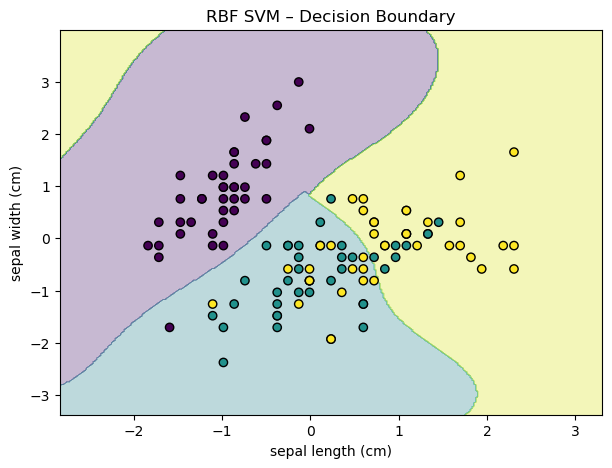

In [21]:
Z_rbf = svm_rbf.predict(np.c_[xx.ravel(), yy.ravel()])
Z_rbf = Z_rbf.reshape(xx.shape)

plt.figure(figsize=(7, 5))
plt.contourf(xx, yy, Z_rbf, alpha=0.3)

plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1],
            c=y_train, edgecolors='k')

plt.xlabel("sepal length (cm)")
plt.ylabel("sepal width (cm)")
plt.title("RBF SVM – Decision Boundary")
plt.show()

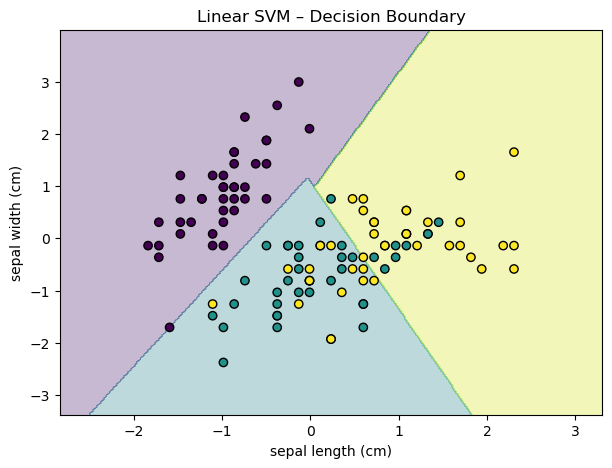

In [22]:
import matplotlib.pyplot as plt

Z_linear = svm_linear.predict(np.c_[xx.ravel(), yy.ravel()])
Z_linear = Z_linear.reshape(xx.shape)

plt.figure(figsize=(7, 5))
plt.contourf(xx, yy, Z_linear, alpha=0.3)

plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1],
            c=y_train, edgecolors='k')

plt.xlabel("sepal length (cm)")
plt.ylabel("sepal width (cm)")
plt.title("Linear SVM – Decision Boundary")
plt.show()

# Voting Regressor
combine conceptually different machine learning regressors and return the average predicted values.

In [23]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.linear_model import LinearRegression

In [24]:
#load some example data
x,y = load_diabetes(return_X_y=True)

#creat seperate models
m1 = GradientBoostingRegressor(random_state=3)
m2 = RandomForestRegressor(random_state=3)
m3 = LinearRegression()

m1.fit(x, y)
m2.fit(x, y)
m3.fit(x, y)

#create voting regressor
reg = VotingRegressor(estimators=[('gb',m1),('rf',m2),('lr',m3)])
reg = reg.fit(x,y)

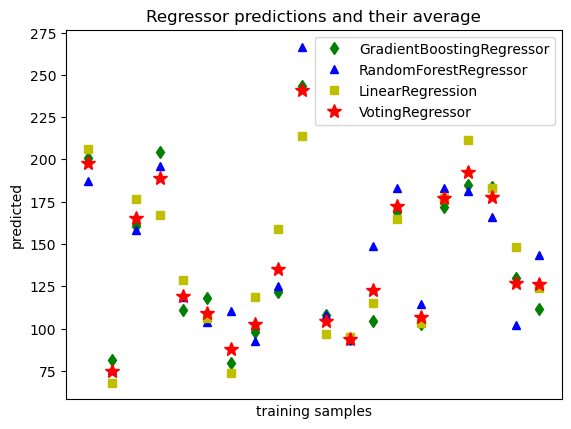

In [25]:
#making first 20 predictions using each regressor
xt = x[:20]
pred1 = m1.predict(xt)
pred2 = m2.predict(xt)
pred3 = m3.predict(xt)
pred4 = reg.predict(xt)


#plotting the results
plt.figure()
plt.plot(pred1, "gd", label="GradientBoostingRegressor")
plt.plot(pred2, "b^", label="RandomForestRegressor")
plt.plot(pred3, "ys", label="LinearRegression")
plt.plot(pred4, "r*", ms=10, label="VotingRegressor")

plt.tick_params(axis="x", which="both", bottom=False, top=False, labelbottom=False)
plt.ylabel("predicted")
plt.xlabel("training samples")
plt.legend(loc="best")
plt.title("Regressor predictions and their average")

plt.show()

# Voting Classifier

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.metrics import accuracy_score

In [27]:
data = load_iris()
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

m1 = LogisticRegression(max_iter=200)
m2 = RandomForestClassifier(n_estimators=50, random_state=1)
m3 = GaussianNB()

### Soft voting
Final class is chosen based on the highest average predicted probability across all classifiers.

In [28]:
voting_soft = VotingClassifier(
    estimators=[('lr', m1), ('rf', m2), ('gnb', m3)],
    voting='soft'
)

voting_soft.fit(X_train, y_train)
y_pred_soft = voting_soft.predict(X_test)

print(f"Soft Voting Accuracy : {accuracy_score(y_test, y_pred_soft):.5f}")

Soft Voting Accuracy : 0.97368


### Hard voting
Final class is chosen based on the majority vote of predicted class labels from all classifiers.

In [29]:
voting_hard = VotingClassifier(
    estimators=[('lr', m1), ('rf', m2), ('gnb', m3)],
    voting='hard'
)

voting_hard.fit(X_train, y_train)
y_pred_hard = voting_hard.predict(X_test)

print(f"Hard Voting Accuracy : {accuracy_score(y_test, y_pred_hard):.5f}")

Hard Voting Accuracy : 0.97368
